In [3]:
import pandas as pd
import seaborn as sns

In [4]:
cols=('py_version', 'jf_version', 'implementation', 'function', 'time')
df = pd.read_csv('timedruns.csv', names=cols)
#pivoted = df.pivot_table(index=['function'], columns=['implementation'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'damerau_levenshtein_distance'),
  Text(1, 0, 'hamming_distance'),
  Text(2, 0, 'jaro_similarity'),
  Text(3, 0, 'jaro_winkler_similarity'),
  Text(4, 0, 'levenshtein_distance'),
  Text(5, 0, 'match_rating_codex'),
  Text(6, 0, 'match_rating_comparison'),
  Text(7, 0, 'metaphone'),
  Text(8, 0, 'nysiis'),
  Text(9, 0, 'soundex')])

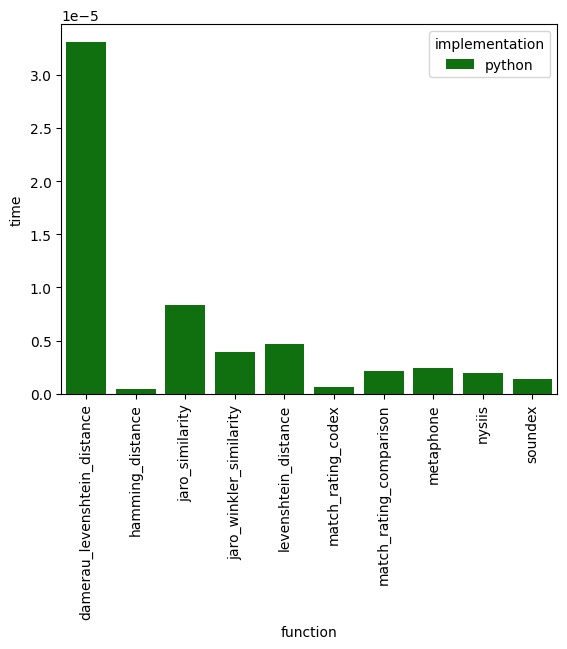

In [5]:
colors = {"python": "green", "c" : "blue", "rust": "red"}

sns.barplot(x='function', y='time', hue='implementation', data=df, palette=colors)
# turn the labels 90 degrees
import matplotlib.pyplot as plt
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'damerau_levenshtein_distance'),
  Text(1, 0, 'hamming_distance'),
  Text(2, 0, 'jaro_similarity'),
  Text(3, 0, 'jaro_winkler_similarity'),
  Text(4, 0, 'levenshtein_distance'),
  Text(5, 0, 'match_rating_codex'),
  Text(6, 0, 'match_rating_comparison'),
  Text(7, 0, 'metaphone'),
  Text(8, 0, 'nysiis'),
  Text(9, 0, 'soundex')])

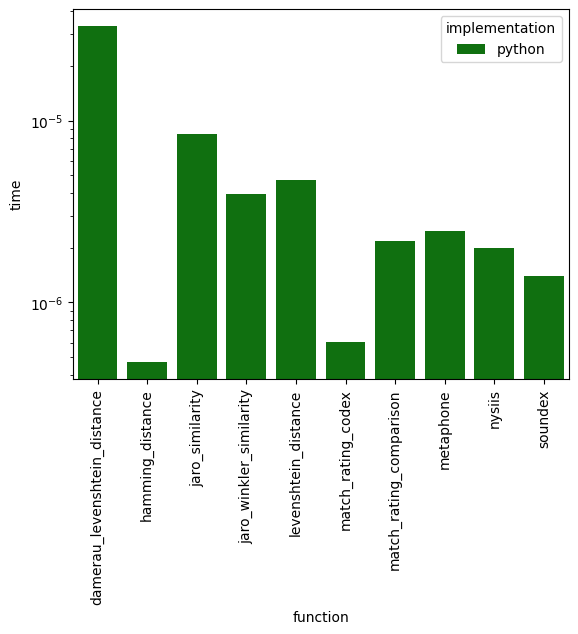

In [6]:
# log scale same plot
sns.barplot(x='function', y='time', hue='implementation', data=df, palette=colors)
plt.yscale('log')
plt.xticks(rotation=90)


In [7]:
pivoted = df.pivot_table(index=['function'], columns=['implementation'], values='time')
pivoted['python/c'] = pivoted['python'] / pivoted['c']
pivoted['rust/c'] = pivoted['python'] / pivoted['rust']
pivoted['rust/python'] = pivoted['rust'] / pivoted['python']
pivoted
pivoted["c"] *= 100000 # multiply by 100000 to get time in microseconds
pivoted["python"] *= 100000
pivoted["rust"] *= 100000

KeyError: 'c'